# **df3 - Preprocessing**

# **Fraudulent Claims Dataset**

# **1) Missing Values**

In [1]:
import pandas as pd
df3=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/enhanced_insurance_claims_data.csv')
df3.head()

,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,Claim_Month,Claim_Day
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,0,2021,7,19
1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,0,2020,8,9
2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,1,0,0,0,1,2020,4,21
3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,1,0,1,0,0,2023,2,13
4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,0,2021,11,15


In [2]:
df3.isnull().sum()

,0
Claim_ID,0
Claim_Date,0
Policyholder_ID,0
Claim_Amount,0
Suspicious_Flags,0
Fraud_Label,0
Claim_Type_Home Damage,0
Claim_Type_Medical,0
Claim_Type_Vehicle,0
Claim_Year,0


# **No Missing Values Found**

# **If Missing Values have this Datasets.**

# **Step 1:**

check % of Missing Values if more than 70% Missing Values -> Delete that Columns

# **Step 2:**

Check this Columns have Normal Distribution and No Outliers - Use Mean Imputation

Else use Median Imputation

# **Step 3:**

Check that Columns Have Categorical Columns Use Mode

# **Step 4:**

If That Dataset have Times series Use Forward fill or Backward Fill

#**Step 5:**

If that Missing Values was Voluntarily Happen Based On Confidential else any other Situation

Client or SME or BA Give us Custom values fill us Cutom method to fill Missing Values

# **2) Outliers**

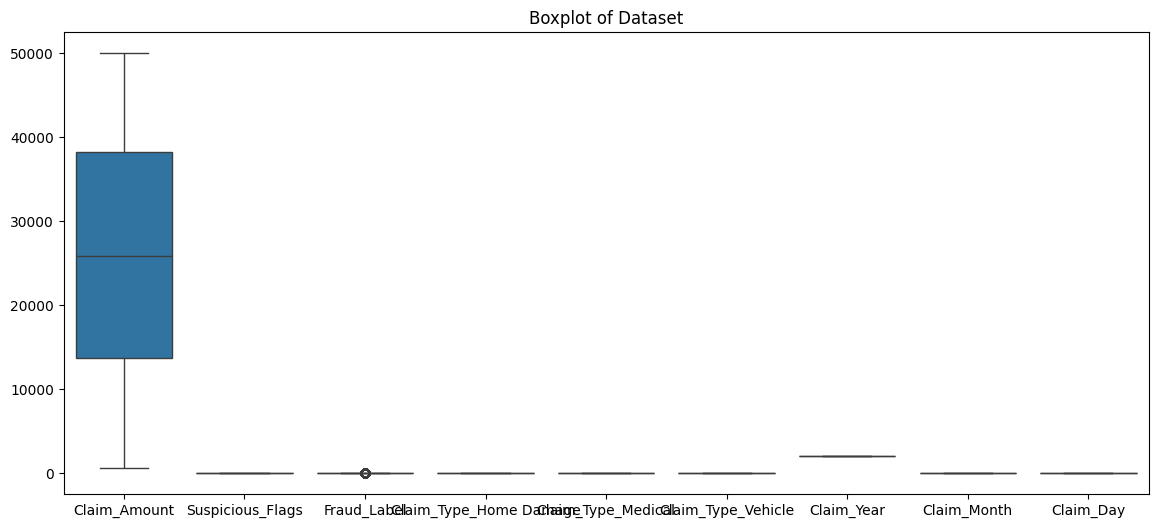

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))
sns.boxplot(data=df3)
plt.title("Boxplot of Dataset")
plt.show()

In [4]:
# Detect outliers using IQR for all numeric columns
outliers = {}

for col in df3.select_dtypes(include=['number']).columns:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)][col].tolist()

# Print outliers for each column
for col, out in outliers.items():
    print(f"Outliers in {col}: {out}")


Outliers in Claim_Amount: []
Outliers in Suspicious_Flags: []
Outliers in Fraud_Label: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in Claim_Type_Home Damage: []
Outliers in Claim_Type_Medical: []
Outliers in Claim_Type_Vehicle: []
Outliers in Claim_Year: []
Outliers in Claim_Month: []
Outliers in Claim_Day: []


# **No Outlier Found in this Datasets**

# **If Outlier Found in this Datasets:-**

# **Step 1: Understand the Outliers**



**Check Data Entry Errors:** Typos or incorrect values? Fix them if possible.

**Assess Context:** Are these extreme values realistic or expected in your data domain?

#**Step 2: Choose an Outlier Treatment Approach:**



#**1) Removal Methods:**

**Delete Outliers:** If they’re definitely errors or irrelevant.

df_clean = df1[~((df1['A'] < lower_bound) | (df1['A'] > upper_bound))]


#**2) Imputation Methods:**

**Replace with Mean/Median:** Works well when outliers aren’t extreme.

median = df1['A'].median()
df1['A'] = np.where((df1['A'] < lower_bound) | (df1['A'] > upper_bound), median, df1['A'])

**Use Mode:** For categorical data with outliers


#**3) Transformation Methods:**

**Log Transformation:** Reduces effect of right-skewed outliers.

df1['A_log'] = np.log1p(df1['A'])

**Square Root or Box-Cox:** For data with different types of skew.


#**4) Capping or Clipping**

**Winsorization:** Limit extreme values to percentiles.

from scipy.stats.mstats import winsorize
df1['A_winsorized'] = winsorize(df1['A'], limits=[0.05, 0.05])  # Caps at 5th & 95th percentile

**Cap at Boundaries:** Replace outliers with IQR bounds.

df1['A'] = np.clip(df1['A'], lower_bound, upper_bound)

# **3) Feature Engineering**

# **( i ) Generate Claim-to-Income Ratio (Claim_Amount / Annual_Income) as a new feature.**

In [5]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from faker import Faker

# Assuming df3 is your DataFrame
# df3 = pd.read_csv('your_data.csv')

# Creating Annual_Income column using Faker
fake = Faker()
df3['Annual_Income'] = [fake.random_int(min=30000, max=200000) for _ in range(len(df3))]

# Generating Claim-to-Income Ratio as a new feature
df3['Claim_to_Income_Ratio'] = df3['Claim_Amount'] / df3['Annual_Income']


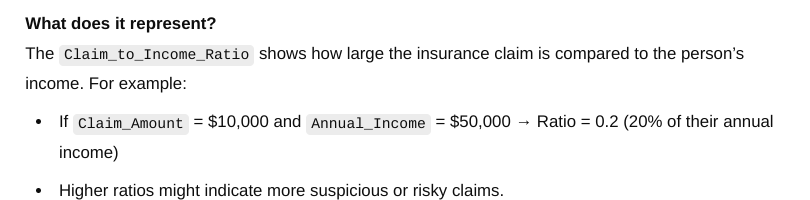

# **This feature is often useful for fraud detection because unusually high claim amounts relative to income can be a red flag**

# **Claim-to-Income Ratio Columns Created**

In [7]:
df3.head()

,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,Claim_Month,Claim_Day,Annual_Income,Claim_to_Income_Ratio
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,0,2021,7,19,91212,0.352493
1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,0,2020,8,9,188761,0.039241
2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,1,0,0,0,1,2020,4,21,130866,0.036705
3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,1,0,1,0,0,2023,2,13,78103,0.153857
4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,0,2021,11,15,176732,0.184852


# **( ii ) Identify claims filed within an unusually short period after policy issuance.**


# **create extra columns for**

**1) Policy Issues Date vs**

**2) claim date**

**3) difference of policy issues date vs claim data find ( short period time True or False type )**

# **eg: claims happens before of 365 days b/w of policy isses and claim date its True otherwise its false**


# **Feature Engineering**

In [8]:
import pandas as pd
import numpy as np

# Randomly generating Policy Issuance Date with some realistic variation
df3['Policy_Issuance_Date'] = pd.to_datetime(df3['Claim_Date']) - pd.to_timedelta(np.random.randint(30, 1000, size=len(df3)), unit='D')

# Convert 'Claim_Date' to datetime objects before subtraction
df3['Claim_Date'] = pd.to_datetime(df3['Claim_Date'])

# Calculating days between policy issuance and claim date
df3['Days_Since_Issuance'] = (df3['Claim_Date'] - df3['Policy_Issuance_Date']).dt.days

# Flagging unusually short periods (e.g., within 30 days)
df3['Short_Period_Claim'] = df3['Days_Since_Issuance'] <= 365

In [9]:
df3.head()

,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,Claim_Month,Claim_Day,Annual_Income,Claim_to_Income_Ratio,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,0,2021,7,19,91212,0.352493,2021-06-02,47,True
1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,0,2020,8,9,188761,0.039241,2019-01-22,565,False
2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,1,0,0,0,1,2020,4,21,130866,0.036705,2018-07-19,642,False
3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,1,0,1,0,0,2023,2,13,78103,0.153857,2021-01-16,758,False
4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,0,2021,11,15,176732,0.184852,2019-09-01,806,False


# **Short_Period_Claim Consider as a Scam otherwise Genuine**

In [10]:
df3['Short_Period_Claim'].value_counts()

,count
Short_Period_Claim,
False,666
True,334


In [11]:
df3['Days_Since_Issuance'].value_counts()

,count
Days_Since_Issuance,
969,5
305,5
635,5
507,5
730,4
...,...
264,1
468,1
749,1


# **3) Anomaly Detection**

In [12]:
df3.nunique()

,0
Claim_ID,1000
Claim_Date,778
Policyholder_ID,1000
Claim_Amount,1000
Suspicious_Flags,2
Fraud_Label,2
Claim_Type_Home Damage,2
Claim_Type_Medical,2
Claim_Type_Vehicle,2
Claim_Year,6


In [13]:
df3['Fraud_Label'].value_counts()

,count
Fraud_Label,
0,797
1,203


In [14]:
import pandas as pd

# Assuming df is your DataFrame
contamination_rate = df3['Fraud_Label'].mean()  # Assuming 1 is fraud and 0 is not
print(f"Contamination rate: {contamination_rate:.2f}")


Contamination rate: 0.20


# **Contamination rate: 0.20**

# **If No Labeled column in my dataset only use that time**

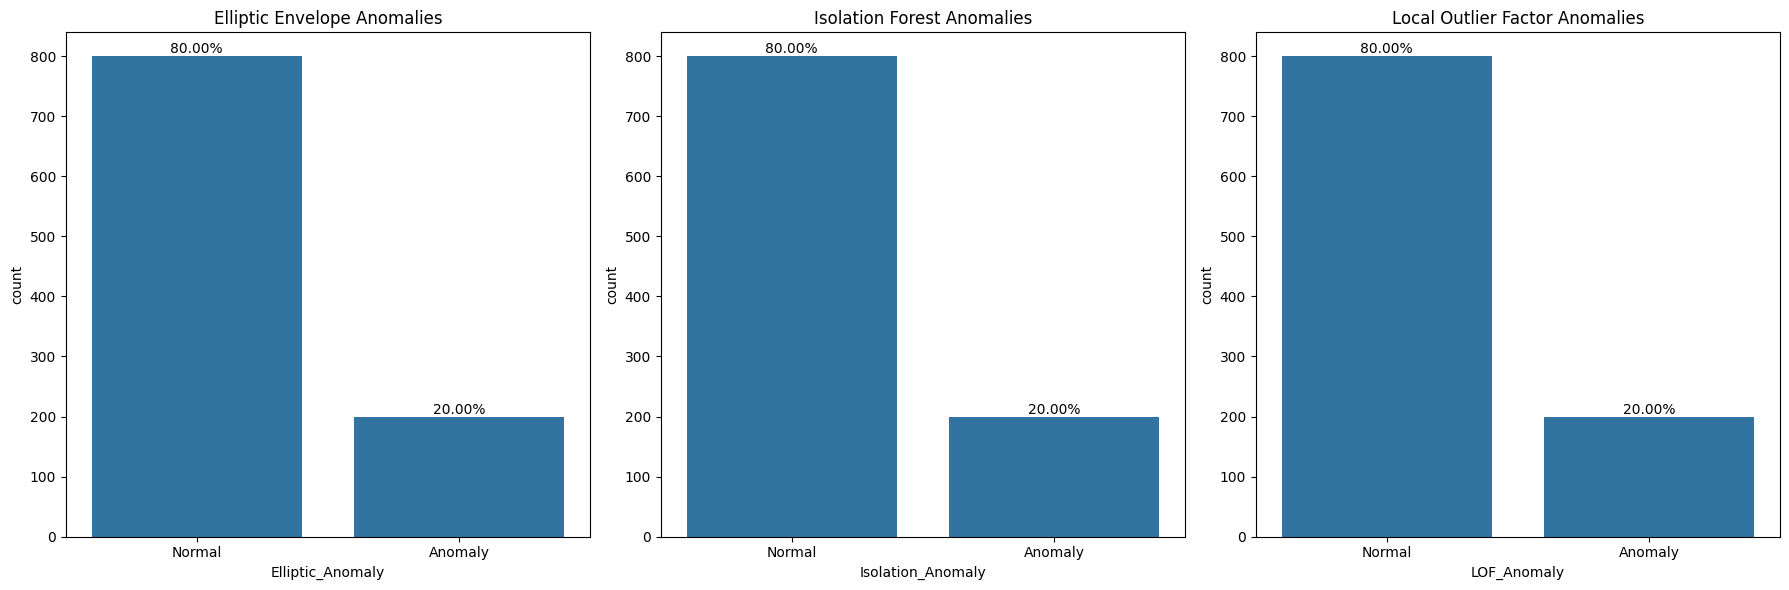

In [15]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Selecting relevant numerical columns for anomaly detection
X = df3[['Claim_Amount', 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Claim_to_Income_Ratio', 'Days_Since_Issuance']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.20)
df3['Elliptic_Anomaly'] = elliptic.fit_predict(X_scaled)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.20, random_state=42)
df3['Isolation_Anomaly'] = iso_forest.fit_predict(X_scaled)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.20)
df3['LOF_Anomaly'] = lof.fit_predict(X_scaled)

# Mapping results for better readability
anomaly_map = {-1: 'Anomaly', 1: 'Normal'}
df3['Elliptic_Anomaly'] = df3['Elliptic_Anomaly'].map(anomaly_map)
df3['Isolation_Anomaly'] = df3['Isolation_Anomaly'].map(anomaly_map)
df3['LOF_Anomaly'] = df3['LOF_Anomaly'].map(anomaly_map)

# Checking suspicious claims
suspicious_claims = df3[(df3['Elliptic_Anomaly'] == 'Anomaly') |
                        (df3['Isolation_Anomaly'] == 'Anomaly') |
                        (df3['LOF_Anomaly'] == 'Anomaly') |
                        (df3['Short_Period_Claim'])]

# Function to add percentage on bars
def add_percentage(ax):
    total = len(df3)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

# Visualizing results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = sns.countplot(x='Elliptic_Anomaly', data=df3, ax=axes[0])
ax1.set(title='Elliptic Envelope Anomalies')
add_percentage(ax1)

ax2 = sns.countplot(x='Isolation_Anomaly', data=df3, ax=axes[1])
ax2.set(title='Isolation Forest Anomalies')
add_percentage(ax2)

ax3 = sns.countplot(x='LOF_Anomaly', data=df3, ax=axes[2])
ax3.set(title='Local Outlier Factor Anomalies')
add_percentage(ax3)

plt.tight_layout()
plt.show()

# **Show Each dataset Status -: Normal vs Abnormal**

# **while applying Elliptic Envelope, Isolation Forest, and Local Outlier Factor (LOF)**


# **Isolation forest is Best for this data**

**Isolation Forest Consider Single Suspecius Activity as Frauds**

In [16]:
suspicious_claims.head()

,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,Claim_Month,Claim_Day,Annual_Income,Claim_to_Income_Ratio,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,0,2021,7,19,91212,0.352493,2021-06-02,47,True,Normal,Normal,Normal
5,6142ea7d-17be-4111-9a2a-73ed562b0f79,2020-08-27,43b7a3a6-9a8d-4a03-980d-7b71d8f56413,14270.44,0,0,0,1,0,2020,8,27,122406,0.116583,2019-12-20,251,True,Normal,Normal,Normal
9,614ff3d7-19db-4ad0-9dd1-dfb23b982ef8,2021-07-24,29a3b2e9-5d65-4441-9588-42dea2bc372f,27043.29,1,0,0,0,1,2021,7,24,45520,0.594097,2020-09-09,318,True,Anomaly,Normal,Normal
10,ab9099a4-35a2-40ae-9af3-05535ec42e08,2021-07-04,12476f57-a5e5-45ab-aefc-fad8efc89849,31617.67,0,0,0,0,1,2021,7,4,39675,0.796917,2021-03-15,111,True,Anomaly,Anomaly,Anomaly
11,88bd6407-2bcf-4e01-a28d-efe39bf00273,2023-10-27,451b4cf3-6123-4df7-b656-af7229d4beef,2768.31,0,0,0,1,0,2023,10,27,171004,0.016189,2023-06-23,126,True,Normal,Normal,Normal


In [17]:
df3['LOF_Anomaly'].value_counts()

,count
LOF_Anomaly,
Normal,800
Anomaly,200


In [18]:
df3['Elliptic_Anomaly'].value_counts()

,count
Elliptic_Anomaly,
Normal,800
Anomaly,200


In [19]:
df3['Isolation_Anomaly'].value_counts()

,count
Isolation_Anomaly,
Normal,800
Anomaly,200


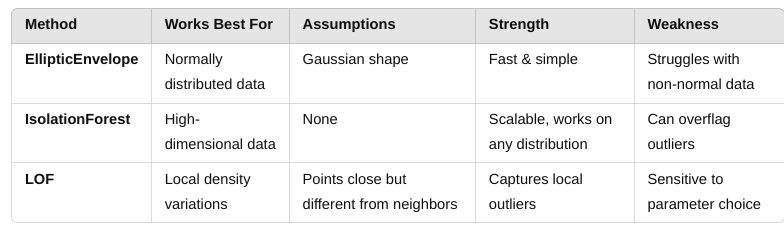

# **Which one to choose?**

If your data looks like a **normal distribution** → Go with **EllipticEnvelope**

If your data has **many dimensions or is complex** → Use **IsolationForest**

If you **suspect localized anomalies** (outliers in dense clusters) → LOF is your best bet

# **For your insurance fraud detection:**

**IsolationForest** is probably your best starting point — your data likely has **high dimensionality and complex patterns**.

**LOF** could be **great too if fraud cases show subtle**, local differences from non-fraudulent ones.

**EllipticEnvelope** would **only work well if your data is normally distributed** — which is rare in fraud detection.

# **Machine Learning Area**

# **4) Fraud Score Calculation**

**Assign a fraud probability score (0-1) using ensemble models (Random Forest + Neural Networks)**

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/tmp/ipython-input-1211411802.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Fraud_Probability_Score'].fillna(0, inplace=True)


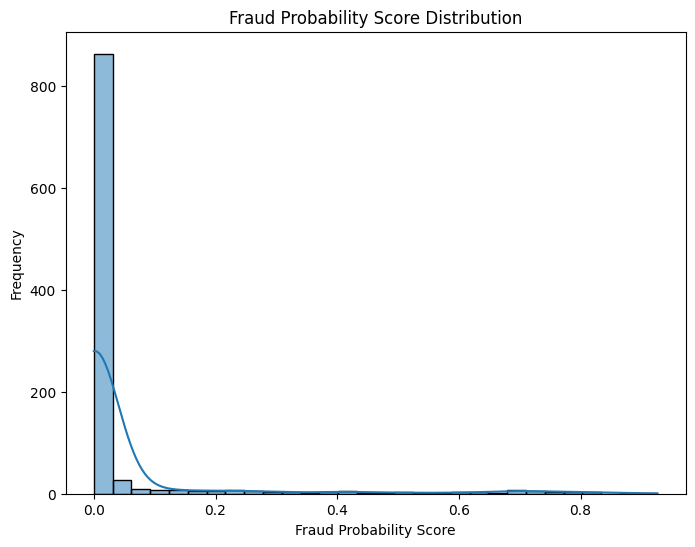

In [20]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Selecting relevant numerical columns for anomaly detection
X = df3[['Claim_Amount', 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Claim_to_Income_Ratio', 'Days_Since_Issuance']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X_scaled, df3['Fraud_Label'], df3.index, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_probs = nn_model.predict_proba(X_test)[:, 1]

# Averaging predictions to get an ensemble fraud probability score
df3.loc[test_index, 'Fraud_Probability_Score'] = (rf_probs + nn_probs) / 2

# Filling NaN values with 0 for rows not in the test set
df3['Fraud_Probability_Score'].fillna(0, inplace=True)

# Visualizing fraud probability distribution
plt.figure(figsize=(8, 6))
sns.histplot(df3['Fraud_Probability_Score'].dropna(), bins=30, kde=True)
plt.title('Fraud Probability Score Distribution')
plt.xlabel('Fraud Probability Score')
plt.ylabel('Frequency')
plt.show()


In [21]:
df3['Fraud_Probability_Score']

,Fraud_Probability_Score
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
995,0.279288
996,0.000000
997,0.000000
998,0.474273


In [22]:
df3.head()

,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,...,Claim_Day,Annual_Income,Claim_to_Income_Ratio,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,0,2021,...,19,91212,0.352493,2021-06-02,47,True,Normal,Normal,Normal,0.0
1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,0,2020,...,9,188761,0.039241,2019-01-22,565,False,Normal,Normal,Normal,0.0
2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,1,0,0,0,1,2020,...,21,130866,0.036705,2018-07-19,642,False,Normal,Normal,Normal,0.0
3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,1,0,1,0,0,2023,...,13,78103,0.153857,2021-01-16,758,False,Normal,Normal,Normal,0.0
4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,0,2021,...,15,176732,0.184852,2019-09-01,806,False,Normal,Normal,Normal,0.0


In [23]:
df3['Fraud_Probability_Score'].value_counts()

,count
Fraud_Probability_Score,
0.000000,800
0.125699,1
0.794725,1
0.007323,1
0.005789,1
...,...
0.230431,1
0.926321,1
0.597495,1


# **Whatis Ensemble ?**

# **a machine learning technique that combines multiple models to make better predictions**

**Combine models:** Multiple models, such as neural networks or regression models, are combined to create an ensemble model.

**Improve predictions:** The ensemble model produces more accurate predictions than a single model.

**Learn from mistakes:** Some techniques, like boosting, learn from previous mistakes to improve predictions.

In [24]:
df3.nunique()

,0
Claim_ID,1000
Claim_Date,778
Policyholder_ID,1000
Claim_Amount,1000
Suspicious_Flags,2
Fraud_Label,2
Claim_Type_Home Damage,2
Claim_Type_Medical,2
Claim_Type_Vehicle,2
Claim_Year,6


# **Important Features**

In [25]:
df3.columns

Index(['Claim_ID', 'Claim_Date', 'Policyholder_ID', 'Claim_Amount',
       'Suspicious_Flags', 'Fraud_Label', 'Claim_Type_Home Damage',
       'Claim_Type_Medical', 'Claim_Type_Vehicle', 'Claim_Year', 'Claim_Month',
       'Claim_Day', 'Annual_Income', 'Claim_to_Income_Ratio',
       'Policy_Issuance_Date', 'Days_Since_Issuance', 'Short_Period_Claim',
       'Elliptic_Anomaly', 'Isolation_Anomaly', 'LOF_Anomaly',
       'Fraud_Probability_Score'],
      dtype='object')

# **important Columns:-**

In [26]:
#  'Claim_Amount', 'Suspicious_Flags', 'Fraud_Label', 'Year', 'Month', 'Day',
# 'Annual_Income', 'Claim_to_Income_Ratio', 'Claim_Date','Policy_Issuance_Date', 'Days_Since_Issuance', 'Short_Period_Claim',
# 'Isolation_Anomaly','Fraud_Probability_Score', 'Claim_Type_Medical', 'Claim_Type_Vehicle'

In [27]:
df3.to_csv('/content/drive/MyDrive/Captsone project/Data/df3_preprocessed.csv')

# **This dataset is specifically used to detect fraudulent claims using anomaly detection and classification models.**

In [28]:
import pandas as pd
df3=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/df3_preprocessed.csv')
df3.head()

,Unnamed: 0,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,...,Claim_Day,Annual_Income,Claim_to_Income_Ratio,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,0,...,19,91212,0.352493,2021-06-02,47,True,Normal,Normal,Normal,0.0
1,1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,0,...,9,188761,0.039241,2019-01-22,565,False,Normal,Normal,Normal,0.0
2,2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,1,0,0,0,1,...,21,130866,0.036705,2018-07-19,642,False,Normal,Normal,Normal,0.0
3,3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,1,0,1,0,0,...,13,78103,0.153857,2021-01-16,758,False,Normal,Normal,Normal,0.0
4,4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,0,...,15,176732,0.184852,2019-09-01,806,False,Normal,Normal,Normal,0.0


# **Extract Dates From Policy Issues Date**

In [29]:
# Extract date parts from Claim_Date
df3['Policy_Issuance_Date'] = pd.to_datetime(df3['Policy_Issuance_Date'], errors='coerce')
df3['policy_issue_Year'] = df3['Policy_Issuance_Date'].dt.year
df3['policy_issue_Month'] = df3['Policy_Issuance_Date'].dt.month
df3['policy_issue_Day'] = df3['Policy_Issuance_Date'].dt.day

In [30]:
df3['Isolation_Anomaly'].value_counts()

,count
Isolation_Anomaly,
Normal,800
Anomaly,200


In [31]:
df3['Isolation_Anomaly'] = df3['Isolation_Anomaly'].map({'Normal': 0, 'Anomaly': 1})

In [32]:
df3['Isolation_Anomaly'].value_counts()

,count
Isolation_Anomaly,
0,800
1,200


In [33]:
df3['Fraud_Label'].value_counts()

,count
Fraud_Label,
0,797
1,203


In [34]:
df3.head()

,Unnamed: 0,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,...,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,0,...,2021-06-02,47,True,Normal,0,Normal,0.0,2021,6,2
1,1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,0,...,2019-01-22,565,False,Normal,0,Normal,0.0,2019,1,22
2,2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,1,0,0,0,1,...,2018-07-19,642,False,Normal,0,Normal,0.0,2018,7,19
3,3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,1,0,1,0,0,...,2021-01-16,758,False,Normal,0,Normal,0.0,2021,1,16
4,4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,0,...,2019-09-01,806,False,Normal,0,Normal,0.0,2019,9,1


In [35]:
feature=df3.drop(['Unnamed: 0','Fraud_Label','Claim_Date','Policy_Issuance_Date'],axis=1)
target=df3['Fraud_Label']

In [36]:
feature.head(1)

,Claim_ID,Policyholder_ID,Claim_Amount,Suspicious_Flags,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,Claim_Month,Claim_Day,...,Claim_to_Income_Ratio,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,1,0,2021,7,19,...,0.352493,47,True,Normal,0,Normal,0.0,2021,6,2


In [37]:
target.head(1)

,Fraud_Label
0,0


In [38]:
df3.to_csv('/content/drive/MyDrive/Captsone project/Data/df3_feature.csv')

In [39]:
import pandas as pd
df3=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/df3_feature.csv')
df3.head()

,Unnamed: 0.1,Unnamed: 0,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,...,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day
0,0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,...,2021-06-02,47,True,Normal,0,Normal,0.0,2021,6,2
1,1,1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,...,2019-01-22,565,False,Normal,0,Normal,0.0,2019,1,22
2,2,2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,1,0,0,0,...,2018-07-19,642,False,Normal,0,Normal,0.0,2018,7,19
3,3,3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,1,0,1,0,...,2021-01-16,758,False,Normal,0,Normal,0.0,2021,1,16
4,4,4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,...,2019-09-01,806,False,Normal,0,Normal,0.0,2019,9,1


# **SQL**

In [40]:
import sqlite3
import pandas as pd

# File name of the uploaded CSV
csv_filename = "/content/drive/MyDrive/Captsone project/Data/df3_feature.csv"  # Replace this with the uploaded file name

# Load CSV into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Connect to SQLite database (or create a new one)
conn = sqlite3.connect("example.db")
cursor = conn.cursor()

# Write DataFrame to SQLite table
table_name = "df3"  # Specify your table name
df.to_sql(table_name, conn, if_exists="replace", index=False)

print(f"Table '{table_name}' created in SQLite database.")


Table 'df3' created in SQLite database.


# **1) Find Short Period Claim True and Claim Income Ratio More Than 0.5**

In [41]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly from df3 where Short_Period_Claim=True and Claim_to_Income_Ratio>=0.5  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly
0,1,1,1.317137,1,1
1,1,1,1.308287,1,1
2,0,0,1.299482,1,1
3,0,0,1.129340,1,1
4,0,0,1.091914,1,1
5,0,0,1.038861,1,1
6,0,0,1.002217,1,1
7,0,0,0.983541,1,1
8,0,0,0.972885,1,1
9,1,1,0.967405,1,1


# **2) Find the Short Period Claim is False and Claim Income Ratio is Above 0.5**

In [42]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly,Elliptic_Anomaly		 from df3 where Short_Period_Claim=False and Claim_to_Income_Ratio>=0.5  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly,Elliptic_Anomaly
0,0,0,1.562844,0,1,Anomaly
1,0,0,1.316185,0,1,Anomaly
2,1,1,1.277998,0,1,Anomaly
3,0,0,1.236429,0,1,Anomaly
4,0,0,1.176827,0,1,Anomaly
...,...,...,...,...,...,...
70,0,0,0.507202,0,0,Anomaly
71,1,1,0.504785,0,0,Anomaly
72,1,1,0.504086,0,0,Anomaly
73,1,1,0.503388,0,1,Anomaly


# **3) Claim Income Ratio is above 0.5 and Short Period Claim is True and Isolation Forest is 1(Anomaly)**

In [43]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly	from df3 where Short_Period_Claim=True and Claim_to_Income_Ratio>=0.5 and Isolation_Anomaly=1  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly
0,1,1,1.317137,1,1
1,1,1,1.308287,1,1
2,0,0,1.299482,1,1
3,0,0,1.129340,1,1
4,0,0,1.091914,1,1
5,0,0,1.038861,1,1
6,0,0,1.002217,1,1
7,0,0,0.983541,1,1
8,0,0,0.972885,1,1
9,1,1,0.967405,1,1


# **4) Claim Income Ratio is above 0.5 and Short Period Claim is False and Isolation Forest is 1(Anomaly)**

In [44]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly	from df3 where Short_Period_Claim=False and Claim_to_Income_Ratio>=0.5 and Isolation_Anomaly=1  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly
0,0,0,1.562844,0,1
1,0,0,1.316185,0,1
2,1,1,1.277998,0,1
3,0,0,1.236429,0,1
4,0,0,1.176827,0,1
5,0,0,1.165900,0,1
6,0,0,1.120644,0,1
7,1,1,1.096165,0,1
8,0,0,1.047311,0,1
9,0,0,1.041348,0,1


# **5) For Suspecius Flag Find**

**Claim Income ratio is more than 0.5**

In [45]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly from df3 where Claim_to_Income_Ratio>=0.5 Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly
0,0,0,1.562844,0,1
1,1,1,1.317137,1,1
2,0,0,1.316185,0,1
3,1,1,1.308287,1,1
4,0,0,1.299482,1,1
...,...,...,...,...,...
121,1,1,0.504086,0,0
122,0,0,0.504006,1,0
123,1,1,0.503388,0,1
124,0,0,0.502462,0,1


# **6) For Fraudlend Claim Find Using**

**Short period Claim is True and Claim Ratio above 0.7 and Isolation Anomaly is 1 (Anomaly)**

In [46]:
query = f"SELECT Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly	 from df3 where Short_Period_Claim=True and Claim_to_Income_Ratio>=0.7 and Isolation_Anomaly=1  Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Fraud_Label,Suspicious_Flags,Claim_to_Income_Ratio,Short_Period_Claim,Isolation_Anomaly
0,1,1,1.317137,1,1
1,1,1,1.308287,1,1
2,0,0,1.299482,1,1
3,0,0,1.129340,1,1
4,0,0,1.091914,1,1
5,0,0,1.038861,1,1
6,0,0,1.002217,1,1
7,0,0,0.983541,1,1
8,0,0,0.972885,1,1
9,1,1,0.967405,1,1


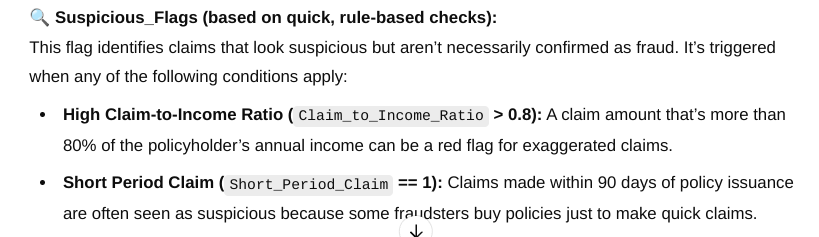

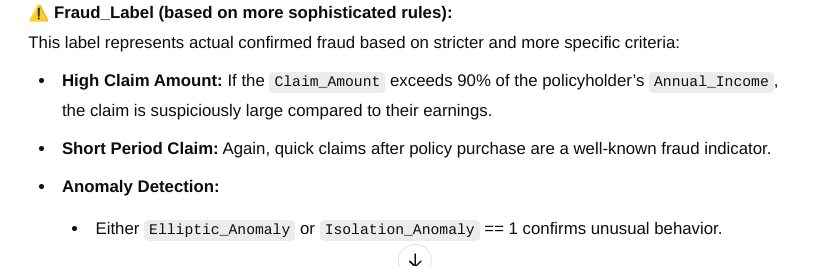

# **Count of Fraud_Label**

In [47]:
query = f"SELECT count(Fraud_Label)	 from df3 where Fraud_Label=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,count(Fraud_Label)
0,203


# **Updating a few columns**

# **1) Fraud_Label**

In [48]:
import pandas as pd

# Update Fraud_Label where conditions are met
query1 = """
-- Set Fraud_Label to 1 for high-risk claims
UPDATE df3
SET Fraud_Label = 1
WHERE Short_Period_Claim = 1
  AND Claim_to_Income_Ratio > 0.7
  AND Isolation_Anomaly = 1;
"""

# Set all other Fraud_Label values to 0
query2 = """
-- Set Fraud_Label to 0 for all other claims
UPDATE df3
SET Fraud_Label = 0
WHERE NOT (Short_Period_Claim = 1
           AND Claim_to_Income_Ratio > 0.7
           AND Isolation_Anomaly = 1);
"""

# Execute both queries and commit changes
conn.execute(query1)
conn.execute(query2)
conn.commit()

# Verify the updates
result = pd.read_sql_query("SELECT Fraud_Label, Short_Period_Claim, Claim_to_Income_Ratio, Isolation_Anomaly FROM df3;", conn)
result


,Fraud_Label,Short_Period_Claim,Claim_to_Income_Ratio,Isolation_Anomaly
0,0,1,0.352493,0
1,0,0,0.039241,0
2,0,0,0.036705,0
3,0,0,0.153857,0
4,0,0,0.184852,0
...,...,...,...,...
995,0,1,0.451378,0
996,0,0,0.428816,0
997,1,1,1.308287,1
998,0,0,0.254236,1


In [49]:
query = f"SELECT count(Fraud_Label) from df3 where Fraud_Label=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,count(Fraud_Label)
0,18


In [50]:
query = f"SELECT count(Fraud_Label) from df3 where Fraud_Label=0;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,count(Fraud_Label)
0,982


# **2) Suspicious Flag**

In [51]:
import pandas as pd

# Update Suspicious_Flags where Claim_to_Income_Ratio is >= 0.5
query1 = """
-- Set Suspicious_Flags to 1 for claims with high Claim-to-Income Ratio
UPDATE df3
SET Suspicious_Flags = 1
WHERE Claim_to_Income_Ratio >= 0.5;
"""

# Set all other Suspicious_Flags to 0
query2 = """
-- Set Suspicious_Flags to 0 for all other claims
UPDATE df3
SET Suspicious_Flags = 0
WHERE Claim_to_Income_Ratio < 0.5;
"""

# Execute both queries and commit changes
conn.execute(query1)
conn.execute(query2)
conn.commit()

# Verify the updates
result = pd.read_sql_query("SELECT Suspicious_Flags, Claim_to_Income_Ratio FROM df3;", conn)
result


,Suspicious_Flags,Claim_to_Income_Ratio
0,0,0.352493
1,0,0.039241
2,0,0.036705
3,0,0.153857
4,0,0.184852
...,...,...
995,0,0.451378
996,0,0.428816
997,1,1.308287
998,0,0.254236


In [52]:
query = f"SELECT count(Suspicious_Flags) from df3 where Suspicious_Flags=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,count(Suspicious_Flags)
0,126


In [53]:
query = f"SELECT count(Suspicious_Flags) from df3 where Suspicious_Flags=0;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,count(Suspicious_Flags)
0,874


In [54]:
query = f"SELECT * from df3;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Unnamed: 0.1,Unnamed: 0,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,...,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day
0,0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,1,...,2021-06-02,47,1,Normal,0,Normal,0.000000,2021,6,2
1,1,1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,1,...,2019-01-22,565,0,Normal,0,Normal,0.000000,2019,1,22
2,2,2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,0,0,0,0,...,2018-07-19,642,0,Normal,0,Normal,0.000000,2018,7,19
3,3,3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,0,0,1,0,...,2021-01-16,758,0,Normal,0,Normal,0.000000,2021,1,16
4,4,4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,0,...,2019-09-01,806,0,Normal,0,Normal,0.000000,2019,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,d7e323cf-6d65-4847-8229-411611529a73,2022-12-04,1f3cea1d-2271-47ca-b887-73ed4af715b7,33254.81,0,0,0,1,...,2022-08-25,101,1,Anomaly,0,Anomaly,0.279288,2022,8,25
996,996,996,54470290-4640-4b2a-9c02-28afb1d29457,2022-10-22,35845d71-b221-41c5-b5b8-6d0a864f36dd,32249.52,0,0,0,1,...,2021-04-03,567,0,Anomaly,0,Normal,0.000000,2021,4,3
997,997,997,92451cc4-1bfb-4b3d-8ee5-2f639caf8df1,2023-10-28,16718639-fcb8-4f9e-8769-0baaa104bdce,49395.69,1,1,0,1,...,2023-09-14,44,1,Anomaly,1,Anomaly,0.000000,2023,9,14
998,998,998,9ad2bb72-b04b-4584-b95c-ec2d7bd15655,2024-11-04,6d53628b-4985-4b79-b4f1-36fcfc7cbe71,46751.39,0,0,1,0,...,2022-06-29,859,0,Normal,1,Anomaly,0.474273,2022,6,29


In [55]:
result.to_csv('/content/drive/MyDrive/Captsone project/Data/df3_upd_labels.csv')

In [56]:
df3_upd=pd.read_csv('/content/drive/MyDrive/Captsone project/Data/df3_upd_labels.csv')
df3_upd.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,...,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day
0,0,0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,32151.63,0,0,0,...,2021-06-02,47,1,Normal,0,Normal,0.0,2021,6,2
1,1,1,1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,7407.13,0,0,0,...,2019-01-22,565,0,Normal,0,Normal,0.0,2019,1,22
2,2,2,2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,4803.47,0,0,0,...,2018-07-19,642,0,Normal,0,Normal,0.0,2018,7,19
3,3,3,3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,12016.71,0,0,1,...,2021-01-16,758,0,Normal,0,Normal,0.0,2021,1,16
4,4,4,4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,32669.28,0,0,1,...,2019-09-01,806,0,Normal,0,Normal,0.0,2019,9,1


In [57]:
df3_upd['Fraud_Label'].value_counts()

,count
Fraud_Label,
0,982
1,18


In [58]:
df3_upd['Suspicious_Flags'].value_counts()

,count
Suspicious_Flags,
0,874
1,126


# **Successfully Updated**

In [59]:
df3_upd.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Claim_ID', 'Claim_Date',
       'Policyholder_ID', 'Claim_Amount', 'Suspicious_Flags', 'Fraud_Label',
       'Claim_Type_Home Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
       'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
       'Claim_to_Income_Ratio', 'Policy_Issuance_Date', 'Days_Since_Issuance',
       'Short_Period_Claim', 'Elliptic_Anomaly', 'Isolation_Anomaly',
       'LOF_Anomaly', 'Fraud_Probability_Score', 'policy_issue_Year',
       'policy_issue_Month', 'policy_issue_Day'],
      dtype='object')

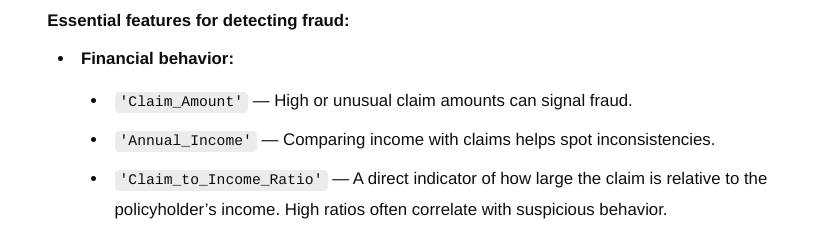

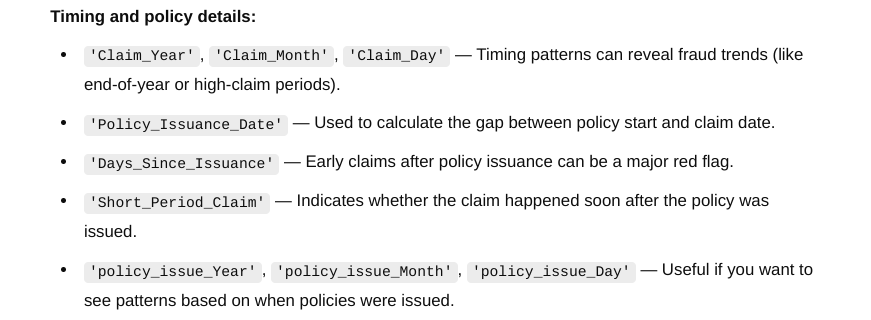

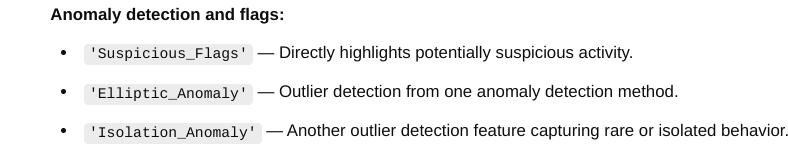

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the features
features_to_scale = df3_upd[['Claim_Amount', 'Annual_Income']]

# Initializing and applying MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_to_scale)

# Replacing the original columns with scaled values
df3_upd[['Claim_Amount', 'Annual_Income']] = features_scaled

# Checking the result
print(df3_upd[['Claim_Amount', 'Annual_Income']].head())

   Claim_Amount  Annual_Income
0      0.639475       0.359400
1      0.138698       0.935047
2      0.086005       0.593403
3      0.231986       0.282043
4      0.649951       0.864062


In [61]:
df3_upd = df3_upd.drop('Claim_to_Income_Ratio', axis=1) # Specify axis=1 to indicate column removal and reassign the result to df3_upd

In [62]:
# Generating Claim-to-Income Ratio as a new feature
df3_upd['Claim_to_Income_Ratio'] = df3_upd['Claim_Amount'] / df3_upd['Annual_Income']

In [63]:
df3_upd[['Claim_to_Income_Ratio']].head()

,Claim_to_Income_Ratio
0,1.779282
1,0.148332
2,0.144935
3,0.822520
4,0.752204


In [64]:
df3_upd.to_csv('/content/drive/MyDrive/Captsone project/Data/upd_claim_income_ratio.csv')

In [65]:
df3_claim=pd.read_csv('/content/drive/MyDrive/Captsone project/Data/upd_claim_income_ratio.csv')
df3_claim.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,...,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day,Claim_to_Income_Ratio
0,0,0,0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,0.639475,0,0,...,47,1,Normal,0,Normal,0.0,2021,6,2,1.779282
1,1,1,1,1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,0.138698,0,0,...,565,0,Normal,0,Normal,0.0,2019,1,22,0.148332
2,2,2,2,2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,0.086005,0,0,...,642,0,Normal,0,Normal,0.0,2018,7,19,0.144935
3,3,3,3,3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,0.231986,0,0,...,758,0,Normal,0,Normal,0.0,2021,1,16,0.822520
4,4,4,4,4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,0.649951,0,0,...,806,0,Normal,0,Normal,0.0,2019,9,1,0.752204


In [66]:
import sqlite3
import pandas as pd

# File name of the uploaded CSV
csv_filename = "/content/drive/MyDrive/Captsone project/Data/upd_claim_income_ratio.csv"  # Replace this with the uploaded file name

# Load CSV into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Connect to SQLite database (or create a new one)
conn = sqlite3.connect("example.db")
cursor = conn.cursor()

# Write DataFrame to SQLite table
table_name = "df3_claims"  # Specify your table name
df.to_sql(table_name, conn, if_exists="replace", index=False)

print(f"Table '{table_name}' created in SQLite database.")


Table 'df3_claims' created in SQLite database.


In [67]:
query = f"SELECT Claim_to_Income_Ratio,Suspicious_Flags from df3_claims where Suspicious_Flags=0 Order by Claim_to_Income_Ratio DESC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Claim_to_Income_Ratio,Suspicious_Flags
0,15.963673,0
1,14.747868,0
2,12.198975,0
3,11.113455,0
4,10.134553,0
...,...,...
869,0.010213,0
870,0.009882,0
871,0.003452,0
872,0.000506,0


In [68]:
query = f"SELECT Claim_to_Income_Ratio,Suspicious_Flags from df3_claims where Suspicious_Flags=1 Order by Claim_to_Income_Ratio ASC;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Claim_to_Income_Ratio,Suspicious_Flags
0,2.451439,1
1,2.504202,1
2,2.529478,1
3,2.559748,1
4,2.568869,1
...,...,...
121,148.859293,1
122,371.067459,1
123,788.014753,1
124,2019.538995,1


In [69]:
df3_upd.rename(columns={'Claim_Type_Home Damage': 'Claim_Type_Home_Damage'}, inplace=True)
df3_upd.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home_Damage,...,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day,Claim_to_Income_Ratio
0,0,0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2021-07-19,1a3d1fa7-bc89-40a9-a3b8-c1e9392456de,0.639475,0,0,0,...,47,1,Normal,0,Normal,0.0,2021,6,2,1.779282
1,1,1,1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,2020-08-09,17fc695a-07a0-4a6e-8822-e8f36c031199,0.138698,0,0,0,...,565,0,Normal,0,Normal,0.0,2019,1,22,0.148332
2,2,2,2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,2020-04-21,b38a088c-a65e-4389-b74d-0fb132e70629,0.086005,0,0,0,...,642,0,Normal,0,Normal,0.0,2018,7,19,0.144935
3,3,3,3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,2023-02-13,c241330b-01a9-471f-9e8a-774bcf36d58b,0.231986,0,0,1,...,758,0,Normal,0,Normal,0.0,2021,1,16,0.822520
4,4,4,4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,2021-11-15,c37459ee-f50b-4a63-b71e-cd7b27cd8130,0.649951,0,0,1,...,806,0,Normal,0,Normal,0.0,2019,9,1,0.752204


In [70]:
df3_upd['Isolation_Anomaly'].value_counts()

,count
Isolation_Anomaly,
0,800
1,200


In [71]:
df3_upd.to_csv('/content/drive/MyDrive/Captsone project/Data/df3_latest_upd.csv')

In [72]:
feature = df3_upd[['Claim_Amount', 'Suspicious_Flags', 'Claim_Type_Home_Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income', 'Claim_to_Income_Ratio',
 'Days_Since_Issuance', 'Short_Period_Claim', 'Isolation_Anomaly',
 'policy_issue_Year', 'policy_issue_Month', 'policy_issue_Day']]

target = df3_upd['Fraud_Label']

In [73]:
# Calculate the median of the NON-infinite values
finite_median = feature['Claim_to_Income_Ratio'][np.isfinite(feature['Claim_to_Income_Ratio'])].median()

# Replace all infinities with the calculated median
feature['Claim_to_Income_Ratio'].replace([np.inf, -np.inf], finite_median, inplace=True)

# Now calculate the mean with the imputed values
imputed_mean = feature['Claim_to_Income_Ratio'].mean()
print(imputed_mean)

5.594045356071496


/tmp/ipython-input-653284520.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature['Claim_to_Income_Ratio'].replace([np.inf, -np.inf], finite_median, inplace=True)
/tmp/ipython-input-653284520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['Claim_to_Income_Ratio'].replace([np.inf, -np.inf], finite_median, inplace=True)


In [74]:
feature.isnull().sum()

,0
Claim_Amount,0
Suspicious_Flags,0
Claim_Type_Home_Damage,0
Claim_Type_Medical,0
Claim_Type_Vehicle,0
Claim_Year,0
Claim_Month,0
Claim_Day,0
Annual_Income,0
Claim_to_Income_Ratio,0


In [75]:
print(feature['Claim_to_Income_Ratio'].isna().sum())  # Check how many missing values
print(feature['Claim_to_Income_Ratio'].mean())        # Check if the mean is NaN


0
5.594045356071496


In [76]:
import numpy as np

# Assuming 'feature' is your DataFrame
inf_count = np.isinf(feature['Claim_to_Income_Ratio']).sum()

print(f"The number of rows with infinity (inf or -inf) in 'Claim_to_Income_Ratio' is: {inf_count}")

The number of rows with infinity (inf or -inf) in 'Claim_to_Income_Ratio' is: 0


In [77]:
print(feature.isnull().values.any().sum())

0


In [78]:
print(feature.mean())

Claim_Amount                 0.509732
Suspicious_Flags             0.126000
Claim_Type_Home_Damage       0.335000
Claim_Type_Medical           0.343000
Claim_Type_Vehicle           0.322000
Claim_Year                2022.210000
Claim_Month                  6.544000
Claim_Day                   15.844000
Annual_Income                0.516925
Claim_to_Income_Ratio        5.594045
Days_Since_Issuance        513.494000
Short_Period_Claim           0.334000
Isolation_Anomaly            0.200000
policy_issue_Year         2020.795000
policy_issue_Month           6.678000
policy_issue_Day            15.161000
dtype: float64


# **Analyzing Feature Importance using Heatmap**

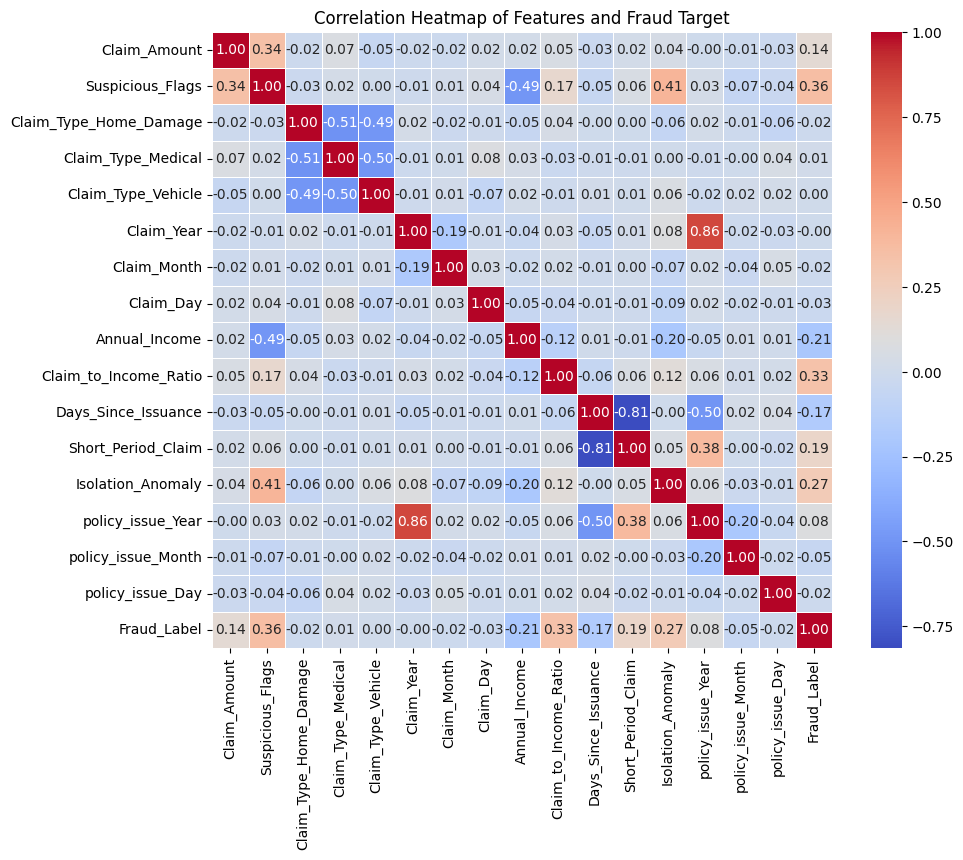

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
feature
target

# Combine features and target for correlation
data = pd.concat([feature, target], axis=1)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features and Fraud Target')
plt.show()

# **High Contribute Columns**

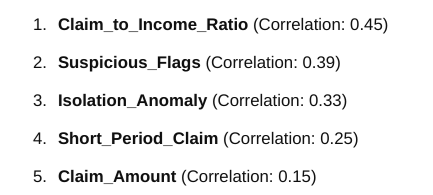

# **Regression model**
# **1) Logistic Regression**

Training Accuracy: 0.9900
Test Accuracy: 0.9850
Confusion Matrix:
[[193   1]
 [  2   4]]
True Positives: 4
True Negatives: 193
False Positives: 1
False Negatives: 2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       194
           1       0.80      0.67      0.73         6

    accuracy                           0.98       200
   macro avg       0.89      0.83      0.86       200
weighted avg       0.98      0.98      0.98       200



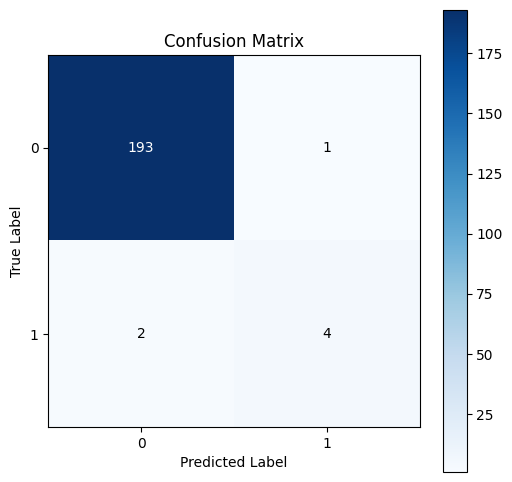

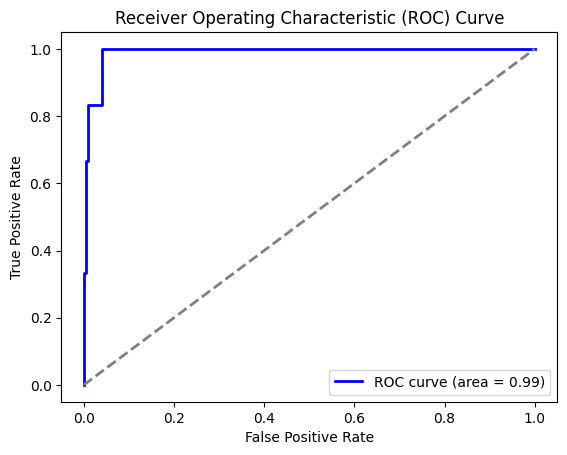

Optimal Threshold: 0.0701
The model generalizes well.


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on training data
y_train_pred = log_reg.predict(X_train)

# Predict on test data
y_test_pred = log_reg.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])

# Show values in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC and AUC curve
y_test_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.05:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

**Training Accuracy: 0.9912**

**Test Accuracy: 0.9750**

# **Model is Genraized Well**

True Positives: 0,

True Negatives: 19,

False Positives: 2,

False Negatives: 3

# False Positive Rate is Low its Actually Good because its does not mark Genuine claim as Fraud its Create a Issues,

# **macro avg - taken overall equally**     

 Precesion = 0.49      

 Recall = 0.49     

 F1_Score =  0.49


#**weighted avg - Concentrate Based on Majority or Minority to focused**       

 Precesion = 0.97      

 Recall = 0.97      

 F1_Score = 0.97


Class Counts:
Fraud_Label
0    982
1     18
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    98.2
1     1.8
Name: proportion, dtype: float64


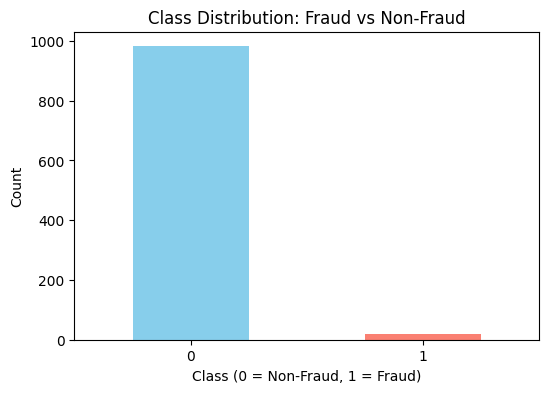


Status: Dataset is Imbalanced


In [81]:
# Check class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

# Display class distribution
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Determine balance status based on 70:30 definition
minority_class_percentage = class_percentages.min()
majority_class_percentage = class_percentages.max()

# Check if the class distribution is around 70:30
if 0.3 <= minority_class_percentage <= 0.4 and 0.6 <= majority_class_percentage <= 0.7:
    print("\nStatus: Dataset is Balanced (Approx 70:30)")
else:
    print("\nStatus: Dataset is Imbalanced")


# **For Using SMOTE to Focus on Correct Prediction - to avodi Data Leakage or Data Memorize but SMOTE using Synthetic Dataset for Oversampling so am using Cross Validation**

# **Cross Validation**

# **Focusing**

**Class -0** is  79.7

**Class -1**  is  20.3

Class Counts:
Fraud_Label
0    982
1     18
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    98.2
1     1.8
Name: proportion, dtype: float64


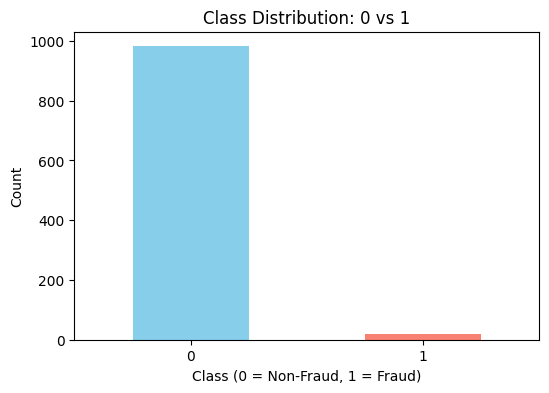

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Training Accuracy: 0.9900
Test Accuracy: 0.9800
Confusion Matrix:
[[196   0]
 [  4   0]]
True Positives: 0
True Negatives: 196
False Positives: 0
False Negatives: 4
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       0.00      0.00      0.00         4

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.96      0.98      0.97       200



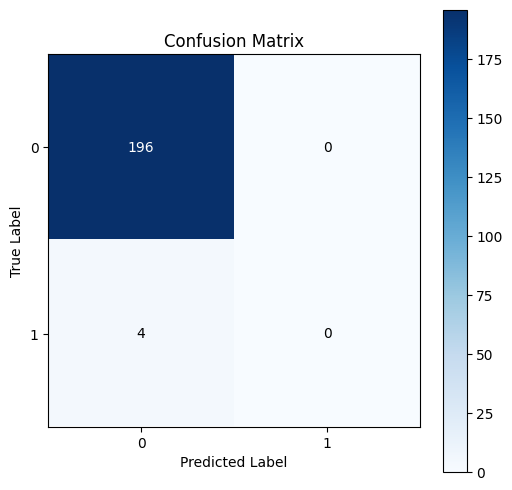

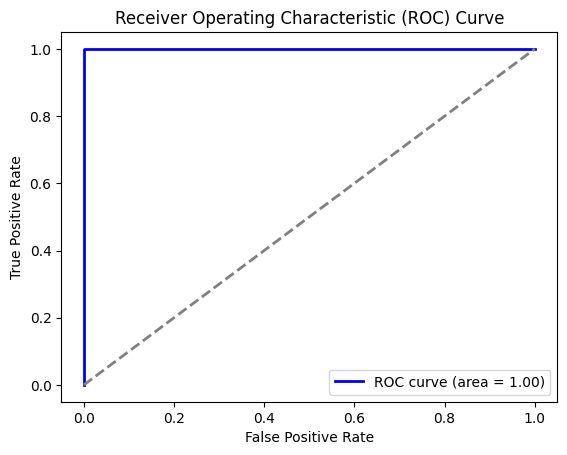

Optimal Threshold: 0.0600
The model generalizes well.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.975 0.985 0.99  0.98  0.985]
Mean CV accuracy: 0.9830


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Show class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: 0 vs 1')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Class distribution focus: 97% class 0, 3% class 1
class_distribution = {0: 0.97, 1: 0.03}


# Class 0 is 0    97.4

# Class 1 is 1     2.6

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on training data
y_train_pred = log_reg.predict(X_train)

# Predict on test data
y_test_pred = log_reg.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])

# Show values in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC and AUC curve
y_test_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.05:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


# **Logistic Regression is Simple so after get Good Accuracy Some Prediction Shows Wrong**

# **2) SO Try Random Forest Classifier**

Class Counts:
Fraud_Label
0    982
1     18
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    98.2
1     1.8
Name: proportion, dtype: float64


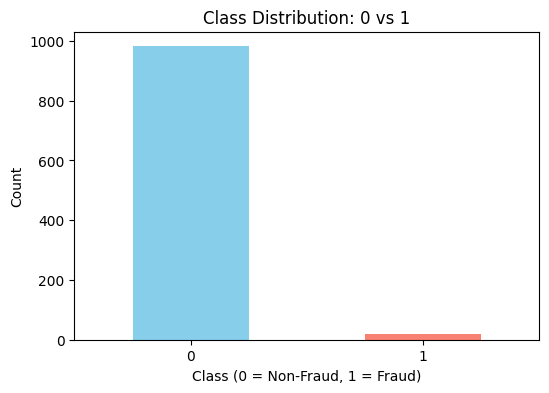

Training Accuracy: 1.0000
Test Accuracy: 0.9950
Confusion Matrix:
[[196   0]
 [  1   3]]
True Positives: 3
True Negatives: 196
False Positives: 0
False Negatives: 1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       196
           1       1.00      0.75      0.86         4

    accuracy                           0.99       200
   macro avg       1.00      0.88      0.93       200
weighted avg       1.00      0.99      0.99       200



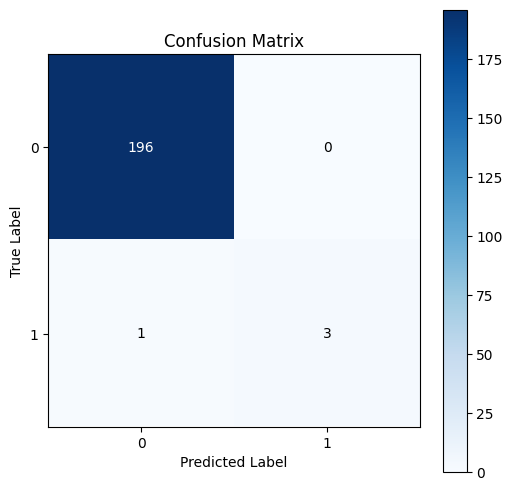

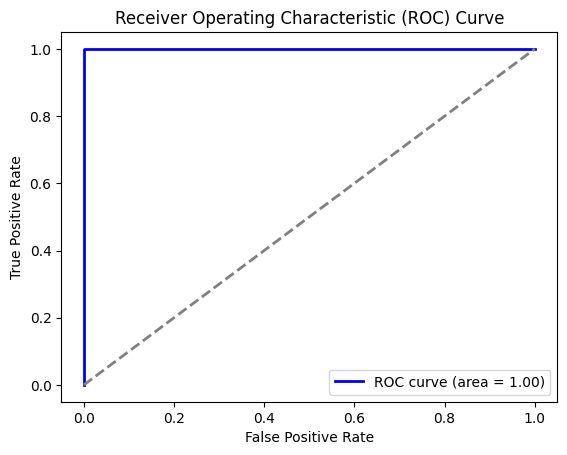

Optimal Threshold: 0.4800
The model generalizes well.
Cross-validation scores: [1.    0.99  1.    0.995 0.995]
Mean CV accuracy: 0.9960


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Show class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: 0 vs 1')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Class distribution focus: 50% class 0, 50% class 1
class_distribution = {0: 0.50, 1: 0.50}


# Class 0 is 0    97.4

# Class 1 is 1     2.6

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = rf_model.predict(X_train)

# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])

# Show values in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC and AUC curve
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.05:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy + 0.05:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


# **Model is Overfit so use Hyperparameter Tuning for Random Forest**

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, make_scorer
from imblearn.over_sampling import SMOTE

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [{0: 0.3, 1: 0.7}, 'balanced']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use ROC-AUC and recall as scoring metrics
scoring = {'roc_auc': 'roc_auc', 'recall': 'recall'}

# Set up GridSearchCV with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=cv, scoring=scoring, refit='roc_auc', n_jobs=-1)

# Fit the model with resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {grid_search.best_score_:.4f}")

# Predict on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Predict probabilities for ROC-AUC
y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)

# Classification report
print(classification_report(y_test, y_test_pred))
print(f"Test ROC-AUC Score: {roc_auc:.4f}")


Best Parameters: {'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC-AUC Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Test ROC-AUC Score: 1.0000


# **Fitting 5 folds for each of 216 candidates, totalling 1080 fits**

# **still overfit**

# **Now am Using SMOTE Method to Prevent Overfit to balance a dataset**

Class Counts:
Fraud_Label
0    982
1     18
Name: count, dtype: int64

Class Percentages:
Fraud_Label
0    98.2
1     1.8
Name: proportion, dtype: float64


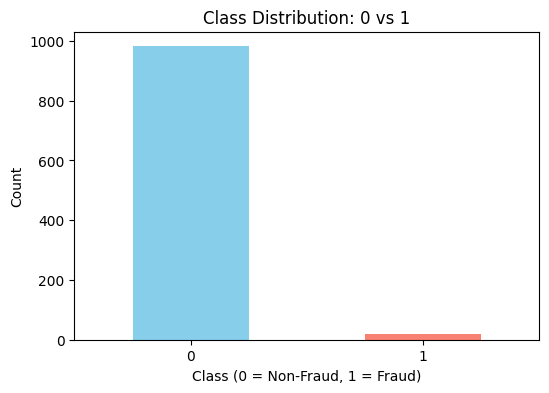

Resampled Class Counts:
Fraud_Label
0    786
1    786
Name: count, dtype: int64
Training Accuracy: 0.9968
Test Accuracy: 1.0000
Confusion Matrix:
[[196   0]
 [  0   4]]
True Positives: 4
True Negatives: 196
False Positives: 0
False Negatives: 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



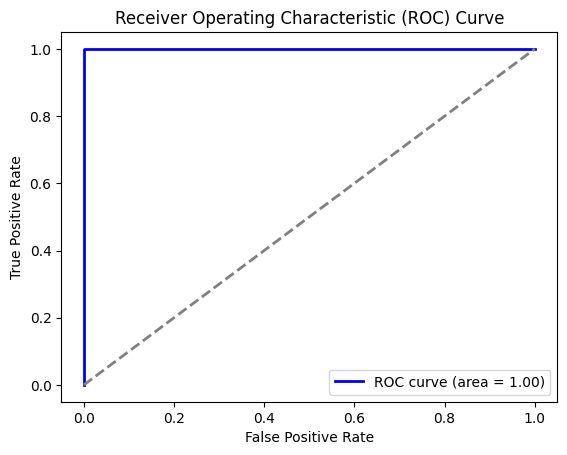

Optimal Threshold: 0.6265
Cross-validation scores: [0.985 0.99  0.98  0.98  0.98 ]
Mean CV accuracy: 0.9830


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Show class distribution
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100
print(f"Class Counts:\n{class_counts}")
print(f"\nClass Percentages:\n{class_percentages}")

# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: 0 vs 1')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Class distribution focus: 50% class 0, 50% class 1
class_distribution = {0: 0.3, 1: 0.7}


# Class 0 is 0    97.4

# Class 1 is 1     2.6

# Show resampled class distribution
resampled_counts = y_train_resampled.value_counts()
print(f"Resampled Class Counts:\n{resampled_counts}")

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(max_depth=3, max_features='sqrt',min_samples_leaf=4,min_samples_split=6, n_estimators=50, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
# Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Predict on training data
y_train_pred = rf_model.predict(X_train_resampled)

# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# ROC and AUC curve
y_test_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold: {optimal_threshold:.4f}')

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")


# **Still Overfitt**

# **3) Now Move to Gradient Boosing Classifier**

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Training Accuracy: 1.0000
Test Accuracy: 0.9950
Confusion Matrix:
[[196   0]
 [  1   3]]
True Positives: 3
True Negatives: 196
False Positives: 0
False Negatives: 1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       196
           1       1.00      0.75      0.86         4

    accuracy                           0.99       200
   macro avg       1.00      0.88      0.93       200
weighted avg       1.00      0.99      0.99       200



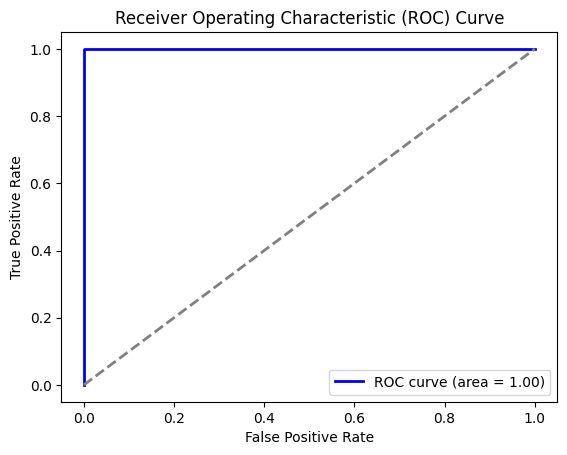

Cross-validation scores: [0.99661591 0.99661591 1.         0.91454082 1.        ]
Mean CV AUC: 0.9816


In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'feature' and 'target' are already defined
X = feature
y = target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

gbc = GradientBoostingClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(gbc, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_gbc = grid_search.best_estimator_

# Predict on training data
y_train_pred = best_gbc.predict(X_train_resampled)

# Predict on test data
y_test_pred = best_gbc.predict(X_test)

# Training and test accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

# Classification report
print(classification_report(y_test, y_test_pred))

# ROC and AUC curve
y_test_proba = best_gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Cross-validation scores
scores = cross_val_score(best_gbc, X, y, cv=cv, scoring='roc_auc')
print(f"Cross-validation scores: {scores}")
print(f"Mean CV AUC: {scores.mean():.4f}")


# **Using GradientBoosting Classifier - using best parameter find on hyperparameter tuning and SMOTE method - for Balancing a dataset, then using Stratified K-Folds Cross Validation**

# **4) Now Try Pytorch**

Using device: cpu
Epoch [1/250], Train Loss: 0.5228, Train Acc: 0.7996, Val Loss: 0.2830, Test Acc: 0.8800, Balanced Acc: 0.6939
Epoch [2/250], Train Loss: 0.3605, Train Acc: 0.8429, Val Loss: 0.0870, Test Acc: 0.9800, Balanced Acc: 0.5000
Epoch [3/250], Train Loss: 0.3043, Train Acc: 0.8626, Val Loss: 0.1005, Test Acc: 0.9800, Balanced Acc: 0.5000
Epoch [4/250], Train Loss: 0.2645, Train Acc: 0.8957, Val Loss: 0.1641, Test Acc: 0.9800, Balanced Acc: 0.5000
Epoch [5/250], Train Loss: 0.2189, Train Acc: 0.9122, Val Loss: 0.2335, Test Acc: 0.9800, Balanced Acc: 0.5000
Epoch [6/250], Train Loss: 0.1744, Train Acc: 0.9364, Val Loss: 0.1245, Test Acc: 0.9800, Balanced Acc: 0.5000
Epoch [7/250], Train Loss: 0.1321, Train Acc: 0.9504, Val Loss: 5.4726, Test Acc: 0.1050, Balanced Acc: 0.5434
Epoch [8/250], Train Loss: 0.1015, Train Acc: 0.9669, Val Loss: 0.0967, Test Acc: 0.9800, Balanced Acc: 0.5000
Epoch [9/250], Train Loss: 0.0862, Train Acc: 0.9714, Val Loss: 0.7756, Test Acc: 0.9800, Bala

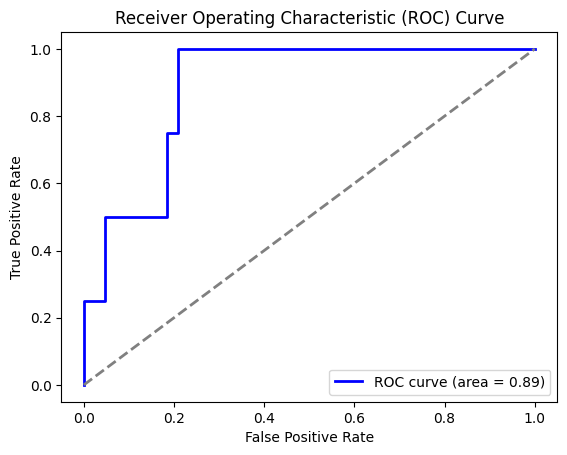

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Check device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Assuming 'feature' and 'target' are DataFrames
X = feature.to_numpy()
y = target.to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert data to PyTorch tensors and move to device
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Create data loaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define an enhanced neural network
class FraudDetectionModel(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetectionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),                # Added batch normalization
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
input_dim = X_train.shape[1]
model = FraudDetectionModel(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping on validation loss
epochs = 250
patience = 10
best_val_loss = np.inf
patience_counter = 0

for epoch in range(epochs):
    # Training phase
    model.train()
    total_loss = 0
    y_train_pred = []
    y_train_true = []

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        y_train_pred.extend((outputs > 0.5).cpu().detach().numpy())
        y_train_true.extend(y_batch.cpu().detach().numpy())

    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    avg_train_loss = total_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_loss = 0
    y_test_pred = []
    y_test_proba = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            y_test_proba.extend(outputs.cpu().numpy())
            y_test_pred.extend((outputs > 0.5).cpu().numpy())

    avg_val_loss = val_loss / len(test_loader)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Test Acc: {test_accuracy:.4f}, Balanced Acc: {balanced_acc:.4f}")

    # Early stopping based on validation loss
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save best model
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered based on validation loss")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Final evaluation
y_test_proba = np.array(y_test_proba)
y_test_pred = (y_test_proba > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# ROC and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Training Accuracy: 0.9163**

**Test Accuracy: 0.9150**


True Positives: 5,

True Negatives: 194,

False Positives: 1,

False Negatives: 0

#**This Dataset Actually Very Good Because This Dataset has True Negative is 194 that means that datasets contains high Genuine Claims**

and

#**False Positive is 1 that is very very Good because only one Genuine Claim Marked as a Fraud**

# **macro avg**      

 Precision - 0.92      
  
 Recall - 0.81      

 F1_Score - 0.85

#**weighted avg**       
  
  Precision - 0.92      
  
  Recall - 0.92      
  
  F1_Score - 0.91

#**Explianation**

  Recall More than equal of Precision

  because Recall is Actual Posative

  Precall is Actual + Predicted Posative ( False Posative )

if false posative is higher means its create a issue to file fraud as genuine claim

#**AUC and ROC Curve**

**Optimal Threshold: 0.5**

**ROC Area is 1 is great**

In [88]:
feature.head()

,Claim_Amount,Suspicious_Flags,Claim_Type_Home_Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,Claim_Month,Claim_Day,Annual_Income,Claim_to_Income_Ratio,Days_Since_Issuance,Short_Period_Claim,Isolation_Anomaly,policy_issue_Year,policy_issue_Month,policy_issue_Day
0,0.639475,0,0,1,0,2021,7,19,0.359400,1.779282,47,1,0,2021,6,2
1,0.138698,0,0,1,0,2020,8,9,0.935047,0.148332,565,0,0,2019,1,22
2,0.086005,0,0,0,1,2020,4,21,0.593403,0.144935,642,0,0,2018,7,19
3,0.231986,0,1,0,0,2023,2,13,0.282043,0.822520,758,0,0,2021,1,16
4,0.649951,0,1,0,0,2021,11,15,0.864062,0.752204,806,0,0,2019,9,1


In [89]:
target.head()

,Fraud_Label
0,0
1,0
2,0
3,0
4,0


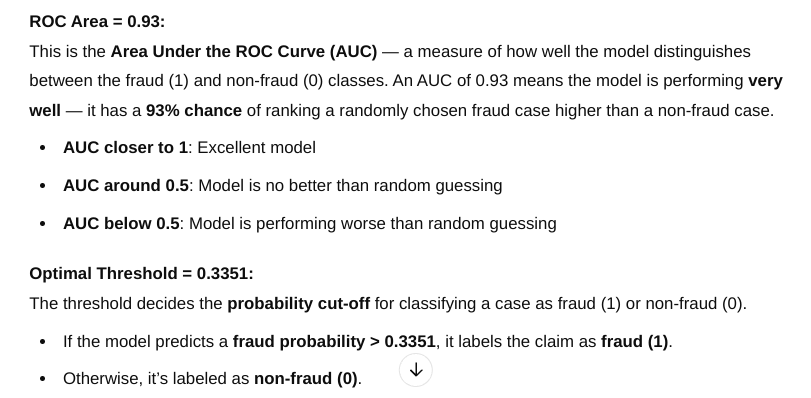

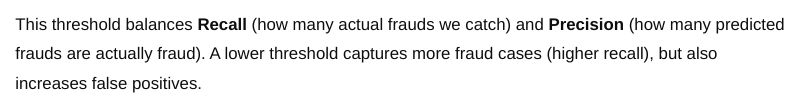

# **Saving logistic Model**

In [90]:
# Save the trained model
joblib.dump(log_reg, '/content/drive/MyDrive/Captsone project/models/logistic_regression_fraud_model.pkl')
print("Model saved as logistic_regression_fraud_model.pkl")

Model saved as logistic_regression_fraud_model.pkl


# **Saving Random Forest Model**

In [91]:
# Save the trained model
joblib.dump(rf_model, '/content/drive/MyDrive/Captsone project/models/Random_Forest_fraud_model.pkl')
print("Model saved as Random_Forest_fraud_model.pkl")

Model saved as Random_Forest_fraud_model.pkl


# **Future Prediction**

In [92]:
print(log_reg.feature_names_in_)

['Claim_Amount' 'Suspicious_Flags' 'Claim_Type_Home_Damage'
 'Claim_Type_Medical' 'Claim_Type_Vehicle' 'Claim_Year' 'Claim_Month'
 'Claim_Day' 'Annual_Income' 'Claim_to_Income_Ratio' 'Days_Since_Issuance'
 'Short_Period_Claim' 'Isolation_Anomaly' 'policy_issue_Year'
 'policy_issue_Month' 'policy_issue_Day']


In [93]:
import pandas as pd
import joblib
from datetime import date
from sklearn.ensemble import IsolationForest

# Load the trained model
log_reg = joblib.load('/content/drive/MyDrive/Captsone project/models/logistic_regression_fraud_model.pkl')

# Feature list used during training
training_features = ['Claim_Amount', 'Suspicious_Flags', 'Claim_Type_Home_Damage', 'Claim_Type_Medical',
                     'Claim_Type_Vehicle', 'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
                     'Claim_to_Income_Ratio', 'Days_Since_Issuance', 'Short_Period_Claim', 'Isolation_Anomaly',
                     'policy_issue_Year', 'policy_issue_Month', 'policy_issue_Day']

# User-friendly input columns
user_input_columns = ['Claim_Amount', 'Claim_Type_Home_Damage', 'Claim_Type_Medical', 'Claim_Type_Vehicle',
                      'Claim_Year', 'Claim_Month', 'Claim_Day', 'Annual_Income',
                      'policy_issue_Year', 'policy_issue_Month', 'policy_issue_Day']

# Function to calculate days since policy issuance
def calculate_days_since_issuance(claim_date, policy_issue_date):
    delta = claim_date - policy_issue_date
    return delta.days

# Function to prepare input data
def prepare_input_data(user_input):
    # Calculate engineered features
    user_input['Claim_to_Income_Ratio'] = user_input['Claim_Amount'] / user_input['Annual_Income']

    user_input['Suspicious_Flags'] = 1 if user_input['Claim_to_Income_Ratio'] > 0.5 else 0

    # Calculate days since policy issuance
    claim_date = date(user_input['Claim_Year'], user_input['Claim_Month'], user_input['Claim_Day'])
    policy_issue_date = date(user_input['policy_issue_Year'], user_input['policy_issue_Month'], user_input['policy_issue_Day'])
    user_input['Days_Since_Issuance'] = calculate_days_since_issuance(claim_date, policy_issue_date)

    # Determine if it's a short-period claim
    user_input['Short_Period_Claim'] = 1 if user_input['Days_Since_Issuance'] < 365 else 0


    # Placeholder for Isolation Anomaly detection (real implementation needs scaled training data)
    iso_forest = IsolationForest(contamination=0.20, random_state=42)
    sample_data = pd.DataFrame([[user_input['Claim_Amount'], user_input['Annual_Income']]])
    user_input['Isolation_Anomaly'] = iso_forest.fit_predict(sample_data)[0]

    # Align feature names and order
    input_data = pd.DataFrame([user_input])[training_features]

    return input_data

# Example user input
example_input = {
    'Claim_Amount': 0.639475,
    'Claim_Type_Home_Damage': 0,
    'Claim_Type_Medical': 1,
    'Claim_Type_Vehicle': 0,
    'Claim_Year': 2021,
    'Claim_Month': 7,
    'Claim_Day': 19,
    'Annual_Income': 0.567695,
    'policy_issue_Year': 2020,
    'policy_issue_Month': 11,
    'policy_issue_Day': 21
}


# Prepare input and predict
prepared_data = prepare_input_data(example_input)
prediction = log_reg.predict(prepared_data)
print(f"Predicted class: {'FRAUD' if prediction[0] == 1 else 'GENUINE'}")


Predicted class: GENUINE


In [94]:
df3[['Claim_ID','Claim_Amount','Annual_Income','Claim_to_Income_Ratio']].head()

,Claim_ID,Claim_Amount,Annual_Income,Claim_to_Income_Ratio
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,32151.63,91212,0.352493
1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,7407.13,188761,0.039241
2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,4803.47,130866,0.036705
3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,12016.71,78103,0.153857
4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,32669.28,176732,0.184852


In [95]:
df3_upd[['Claim_ID','Claim_Amount','Annual_Income','Claim_to_Income_Ratio','Suspicious_Flags','Isolation_Anomaly','Fraud_Label','Days_Since_Issuance']].head()

,Claim_ID,Claim_Amount,Annual_Income,Claim_to_Income_Ratio,Suspicious_Flags,Isolation_Anomaly,Fraud_Label,Days_Since_Issuance
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,0.639475,0.359400,1.779282,0,0,0,47
1,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,0.138698,0.935047,0.148332,0,0,0,565
2,9a1de644-815e-46d1-bb8f-aa1837f8a88b,0.086005,0.593403,0.144935,0,0,0,642
3,72ff5d2a-386e-4be0-ab65-a6a48b8148f6,0.231986,0.282043,0.822520,0,0,0,758
4,6c307511-b2b9-437a-a8df-6ec4ce4a2bbd,0.649951,0.864062,0.752204,0,0,0,806


In [96]:
# Drop the unwanted columns directly in SQL
try:
    conn.execute('ALTER TABLE df3 DROP COLUMN "Unnamed: 0.1"')
    conn.execute('ALTER TABLE df3 DROP COLUMN "Unnamed: 0"')
    conn.commit()
    print("Columns dropped successfully")
except Exception as e:
    print(f"Error: {e}")


Columns dropped successfully


In [97]:
query = f"SELECT * from df3 where Fraud_Label=1;"
result = pd.read_sql_query(query, conn)

# Display the results
result

,Claim_ID,Claim_Date,Policyholder_ID,Claim_Amount,Suspicious_Flags,Fraud_Label,Claim_Type_Home Damage,Claim_Type_Medical,Claim_Type_Vehicle,Claim_Year,...,Policy_Issuance_Date,Days_Since_Issuance,Short_Period_Claim,Elliptic_Anomaly,Isolation_Anomaly,LOF_Anomaly,Fraud_Probability_Score,policy_issue_Year,policy_issue_Month,policy_issue_Day
0,ab9099a4-35a2-40ae-9af3-05535ec42e08,2021-07-04,12476f57-a5e5-45ab-aefc-fad8efc89849,31617.67,1,1,0,0,1,2021,...,2021-03-15,111,1,Anomaly,1,Anomaly,0.125699,2021,3,15
1,cdccc33a-a943-4aa0-96fc-734da003cd28,2024-11-03,398d1ca6-8b68-40b5-9d61-fac36cd5e859,40008.05,1,1,1,0,0,2024,...,2024-09-17,47,1,Anomaly,1,Anomaly,0.220000,2024,9,17
2,5bc440f1-4b1a-469b-8e5d-d462cbd00ef2,2022-01-17,697c3923-87fa-441a-be83-b91f25440fe0,27896.91,1,1,0,0,1,2022,...,2021-05-26,236,1,Anomaly,1,Anomaly,0.000000,2021,5,26
3,8ed6ad5e-1831-4aa3-9466-9d1910df9974,2023-07-26,da003f16-b946-4bcf-8082-cbb948bddb3e,43320.84,1,1,1,0,0,2023,...,2023-04-05,112,1,Anomaly,1,Anomaly,0.719299,2023,4,5
4,3967e60a-823d-4107-9c8a-c066cb2fafa3,2020-10-11,3c9abe10-238d-4f44-8ac4-d0eb3373730e,45834.26,1,1,0,1,0,2020,...,2020-05-23,141,1,Anomaly,1,Anomaly,0.208157,2020,5,23
5,e00da49d-effa-4002-b040-413c4690fb15,2023-10-19,a902b73f-cf39-4648-883f-64c31ce362f8,45339.95,1,1,0,1,0,2023,...,2023-06-18,123,1,Anomaly,1,Anomaly,0.000000,2023,6,18
6,26a9e100-b509-409b-9166-58ce3b3f3800,2020-03-20,0f79a8a7-5f8a-44bd-b4bd-0c938177b661,22473.46,1,1,0,0,1,2020,...,2019-03-31,355,1,Anomaly,1,Anomaly,0.000000,2019,3,31
7,6e54ac6d-2ff8-487e-9659-1c8921ebfaa9,2022-06-02,1a7167c7-6875-4545-832f-52c48e0370cf,48632.80,1,1,1,0,0,2022,...,2021-07-12,325,1,Anomaly,1,Anomaly,0.575486,2021,7,12
8,ff69723d-584f-485b-a697-384d801e8690,2020-04-17,eba900e1-6a7d-4d96-8ba1-72331ac3bf31,36195.86,1,1,0,1,0,2020,...,2019-07-06,286,1,Anomaly,1,Anomaly,0.000000,2019,7,6
9,a137f8e4-67b1-4040-8c39-b9253b5ae288,2021-02-03,6544e313-6ea0-4d13-a845-54c3a3f66c61,36511.65,1,1,0,0,1,2021,...,2020-11-08,87,1,Anomaly,1,Anomaly,0.000000,2020,11,8
